In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime, timedelta, date

import seaborn as sns
sns.set_context('talk')
%matplotlib inline

In [16]:
clima_df = pd.read_csv('./data/merged_temperatures_smn.csv', encoding='unicode_escape')

In [17]:
clima_df.shape

(61102, 8)

In [18]:
clima_df.head()

,FECHA,HORA,TEMP,HUM,PNM,DD,FF,NOMBRE
0,01112020,0,17.1,76,1024.8,70,15,AEROPARQUE AERO
1,01112020,1,16.3,71,1024.3,110,17,AEROPARQUE AERO
2,01112020,2,16.1,64,1023.9,110,11,AEROPARQUE AERO
3,01112020,3,16.2,75,1024.1,70,9,AEROPARQUE AERO
4,01112020,4,16.1,77,1023.9,50,13,AEROPARQUE AERO


In [65]:
clima_df.dtypes

FECHA     object
HORA      object
TEMP      object
HUM       object
PNM       object
DD        object
FF        object
NOMBRE    object
dtype: object

In [71]:
clima_df['TEMP'] = pd.to_numeric(clima_df['TEMP'], errors='coerce')
clima_df['HUM'] = pd.to_numeric(clima_df['HUM'], errors='coerce')
clima_df['PNM'] = pd.to_numeric(clima_df['PNM'], errors='coerce')
clima_df['DD'] = pd.to_numeric(clima_df['DD'], errors='coerce')
clima_df['FF'] = pd.to_numeric(clima_df['FF'], errors='coerce')

In [72]:
clima_df['NOMBRE'].unique()

array(['AEROPARQUE AERO', 'AZUL AERO ', 'BAHIA BLANCA AERO',
       'BARILOCHE AERO', nan, 'BASE BELGRANO II',
       'BASE CARLINI (EX JUBANY)', 'BASE ESPERANZA', 'BASE MARAMBIO',
       'BASE ORCADAS', 'BASE SAN MARTIN', 'BERNARDO DE IRIGOYEN AERO',
       'BOLIVAR AERO', 'BUENOS AIRES OBSERVATORIO', 'CAMPO DE MAYO AERO',
       'CATAMARCA AERO', 'CERES AERO', 'CHAMICAL AERO', 'CHAPELCO AERO',
       'CHEPES', 'CHILECITO AERO', 'CIPOLLETTI',
       'COMODORO RIVADAVIA AERO', 'CONCORDIA AERO', 'CORDOBA AERO',
       'CORDOBA OBSERVATORIO', 'CORONEL PRINGLES AERO',
       'CORONEL SUAREZ AERO', 'CORRIENTES AERO', 'DOLORES AERO',
       'EL BOLSON AERO', 'EL CALAFATE AERO', 'EL PALOMAR AERO',
       'EL TREBOL ', 'ESCUELA DE AVIACION MILITA', 'ESQUEL AERO',
       'EZEIZA AERO', 'FORMOSA AERO', 'GENERAL PICO AERO',
       'GOBERNADOR GREGORES AERO', 'GUALEGUAYCHU AERO', 'IGUAZU AERO',
       'JUJUY AERO', 'JUJUY U N ', 'JUNIN AERO', 'LA PLATA AERO',
       'LA QUIACA OBSERVATORIO', 'LA 

In [73]:
clima_cba_df = clima_df[clima_df['NOMBRE'] == 'CORDOBA AERO']

In [74]:
clima_cba_df.shape

(718, 8)

In [75]:
clima_cba_df.head()

,FECHA,HORA,TEMP,HUM,PNM,DD,FF,NOMBRE
362,01112020,0,12.6,43.0,1022.6,320.0,11.0,CORDOBA AERO
363,01112020,1,12.1,46.0,1022.6,320.0,11.0,CORDOBA AERO
364,01112020,2,11.4,50.0,1022.1,340.0,13.0,CORDOBA AERO
365,01112020,3,11.3,51.0,1021.4,320.0,13.0,CORDOBA AERO
366,01112020,4,9.8,57.0,1020.9,320.0,13.0,CORDOBA AERO


In [76]:
clima_cba_df["FECHA_HORA"] = pd.to_datetime(clima_cba_df['FECHA'] + ' ' + clima_cba_df['HORA'], format="%d%m%Y %H")

# Ordenamos el dataframe por fecha_hora
clima_cba_df = clima_cba_df.sort_values("FECHA_HORA")

/var/folders/rb/fg5nmvjn0qz0h3lqqzfnt5y40000gn/T/ipykernel_61601/276862495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clima_cba_df["FECHA_HORA"] = pd.to_datetime(clima_cba_df['FECHA'] + ' ' + clima_cba_df['HORA'], format="%d%m%Y %H")


In [77]:
clima_cba_df.head()

,FECHA,HORA,TEMP,HUM,PNM,DD,FF,NOMBRE,FECHA_HORA
362,01112020,0,12.6,43.0,1022.6,320.0,11.0,CORDOBA AERO,2020-11-01 00:00:00
363,01112020,1,12.1,46.0,1022.6,320.0,11.0,CORDOBA AERO,2020-11-01 01:00:00
364,01112020,2,11.4,50.0,1022.1,340.0,13.0,CORDOBA AERO,2020-11-01 02:00:00
365,01112020,3,11.3,51.0,1021.4,320.0,13.0,CORDOBA AERO,2020-11-01 03:00:00
366,01112020,4,9.8,57.0,1020.9,320.0,13.0,CORDOBA AERO,2020-11-01 04:00:00


In [78]:
mask = (clima_cba_df['FECHA_HORA'] > '2020-10-30 00:00') & (clima_cba_df['FECHA_HORA'] <= '2020-11-1 23:59')
plot_data = clima_cba_df.loc[mask]
plot_data.head(24)

,FECHA,HORA,TEMP,HUM,PNM,DD,FF,NOMBRE,FECHA_HORA
362,01112020,0,12.6,43.0,1022.6,320.0,11.0,CORDOBA AERO,2020-11-01 00:00:00
363,01112020,1,12.1,46.0,1022.6,320.0,11.0,CORDOBA AERO,2020-11-01 01:00:00
364,01112020,2,11.4,50.0,1022.1,340.0,13.0,CORDOBA AERO,2020-11-01 02:00:00
365,01112020,3,11.3,51.0,1021.4,320.0,13.0,CORDOBA AERO,2020-11-01 03:00:00
366,01112020,4,9.8,57.0,1020.9,320.0,13.0,CORDOBA AERO,2020-11-01 04:00:00
367,01112020,5,9.4,63.0,1020.9,320.0,13.0,CORDOBA AERO,2020-11-01 05:00:00
368,01112020,6,9.6,64.0,1020.8,340.0,11.0,CORDOBA AERO,2020-11-01 06:00:00
369,01112020,7,12.2,67.0,1020.9,340.0,11.0,CORDOBA AERO,2020-11-01 07:00:00
370,01112020,8,18.2,50.0,1021.0,20.0,15.0,CORDOBA AERO,2020-11-01 08:00:00
371,01112020,9,20.6,41.0,1021.1,20.0,20.0,CORDOBA AERO,2020-11-01 09:00:00


In [79]:
# función para formatear las etiquetas del eje X
def format_datetime_axis_ticks(axis, unit):
    if ( unit == 'H' ):
        axis.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        axis.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    elif ( unit == 'D' ):
        axis.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
        axis.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    axis.tick_params(axis='x', labelrotation=45)

## Visualización de la temperatura en muestra de 24hs

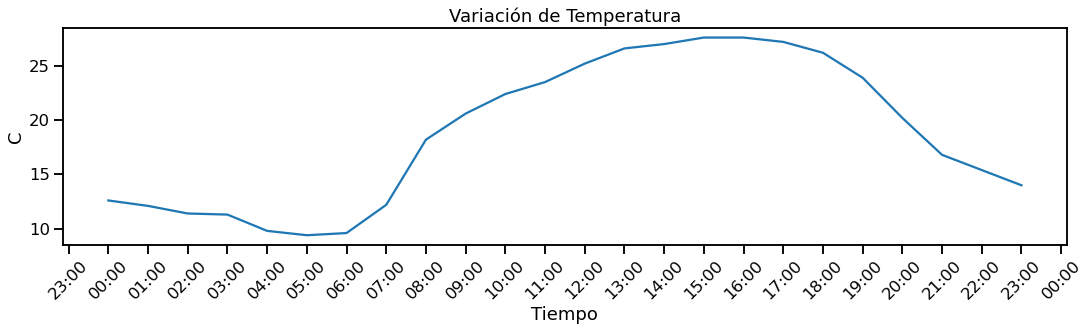

In [80]:
fig, ax = plt.subplots(figsize=(18, 4))
chart = sns.lineplot(x=plot_data['FECHA_HORA'], y=plot_data['TEMP'], ax=ax)

format_datetime_axis_ticks(ax, 'H')
plt.title('Variación de Temperatura')
plt.xlabel('Tiempo')
plt.ylabel('C')
plt.xticks(rotation=45)
plt.show()

In [82]:
## Visualización de la humedad en muestra de 24hs

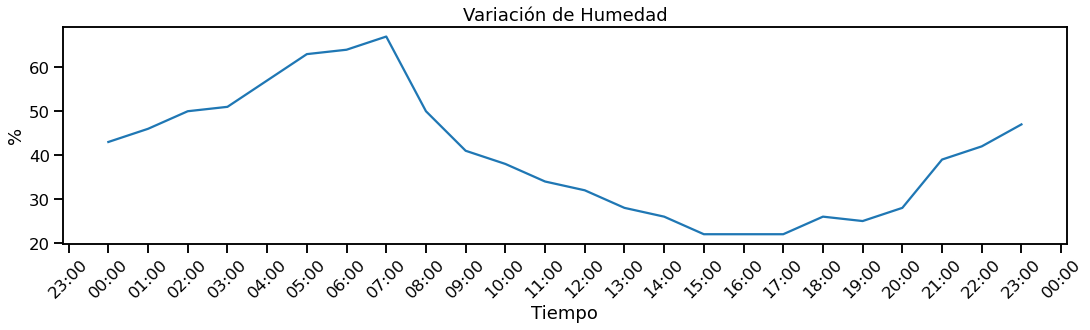

In [83]:
fig, ax = plt.subplots(figsize=(18, 4))
chart = sns.lineplot(x=plot_data['FECHA_HORA'], y=plot_data['HUM'], ax=ax)

format_datetime_axis_ticks(ax, 'H')
plt.title('Variación de Humedad')
plt.xlabel('Tiempo')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.show()

## Detección de datos faltantes

In [81]:
missing_values_count = clima_cba_df.isna().sum()
missing_values_count

FECHA         0
HORA          0
TEMP          0
HUM           0
PNM           0
DD            0
FF            0
NOMBRE        0
FECHA_HORA    0
dtype: int64